In [40]:
#disclaimer the following code are not mine and only provided by the internet, i used it to present the data i found
#in kaggle to visualize the data and to simulate a supervised learning model. The following code will be explain by 
#Sabinet, John Philip sa mga susunod na meeting.
# https://www.datacamp.com/workspace/templates/template-python-resample-a-dataset
# https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
import pandas as pd 
df = pd.read_csv("apple_quality.csv") 
df.head() 


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [41]:
# Data manipulation and visualization imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting size and style
sns.set(rc = {'figure.figsize':(15, 8)})
sns.set_style("darkgrid")

# Preprocessing imports
from sklearn.model_selection import train_test_split

# Create a function to plot resampled data
def plot_resample(X, y, X_res, y_res, method):    
    # Create subplots
    fig, axes = plt.subplot_mosaic([['a', 'b'], ['c', 'd']])
	# Generate scatterplots of first two features for inspection
    sns.scatterplot(x=X.iloc[y.values == 0, 0], y=X.iloc[y.values == 0, 1], alpha=0.10, ax=axes['a'])
    sns.scatterplot(x=X.iloc[y.values == 1, 0], y=X.iloc[y.values == 1, 1], alpha=0.10, ax=axes['a'])
    sns.scatterplot(x=X_res.iloc[y_res.values == 0, 0], y=X_res.iloc[y_res.values == 0, 1], alpha=0.10, ax=axes['b'])
    sns.scatterplot(x=X_res.iloc[y_res.values == 1, 0], y=X_res.iloc[y_res.values == 1, 1], alpha=0.10, ax=axes['b'])
    sns.countplot(y=y, ax=axes['c'])
    sns.countplot(y=y_res, ax=axes['d'])
    # Set titles and show plot
    plt.suptitle(method + ' Outcomes')
    axes['a'].title.set_text('Original Data')
    axes['b'].title.set_text(method + ' Data')
    axes['c'].title.set_text('Original Class Proportions')
    axes['d'].title.set_text(method + ' Class Proportions')
    plt.tight_layout()
    plt.show()

In [42]:
# Import the data (add your own file here)
df = pd.read_csv("apple_quality.csv")

# Preview the data
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


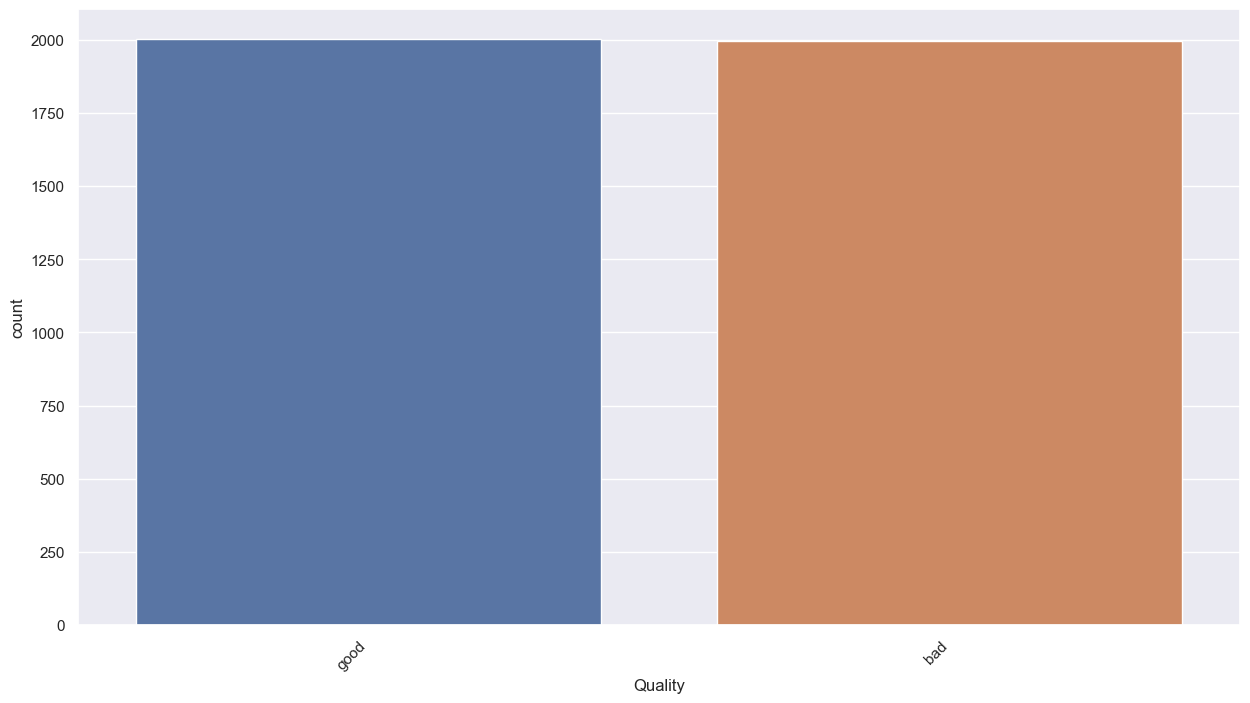

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='Quality',hue='Quality')
plt.xticks(rotation=45, ha='right');

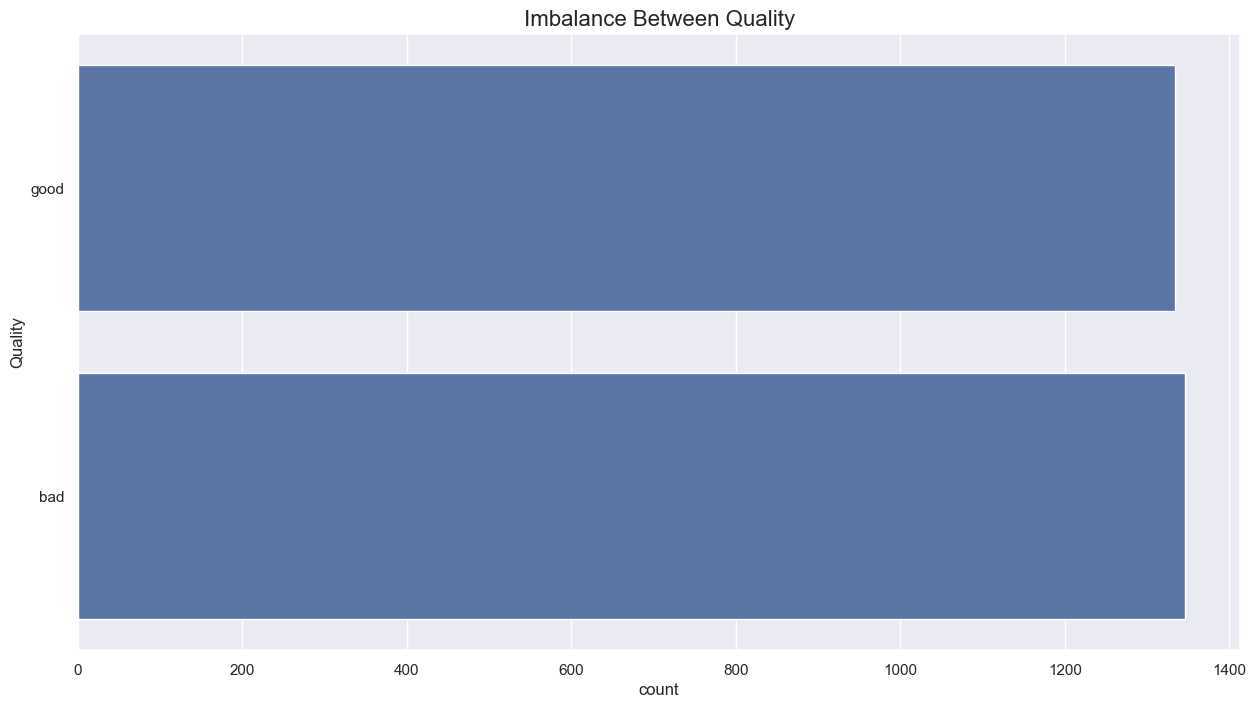

In [44]:
# Set target and feature variables (add your own here)
target = "Quality"
features = ["Size","Weight","Sweetness","Crunchiness","Juiciness","Ripeness","Acidity"]

# Separate the target from the features
y = df[target]
X = df[features]

# Split the data into train and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Plot the counts of the 
sns.countplot(y=y_train) 
plt.title("Imbalance Between Quality", size=16)
plt.show()

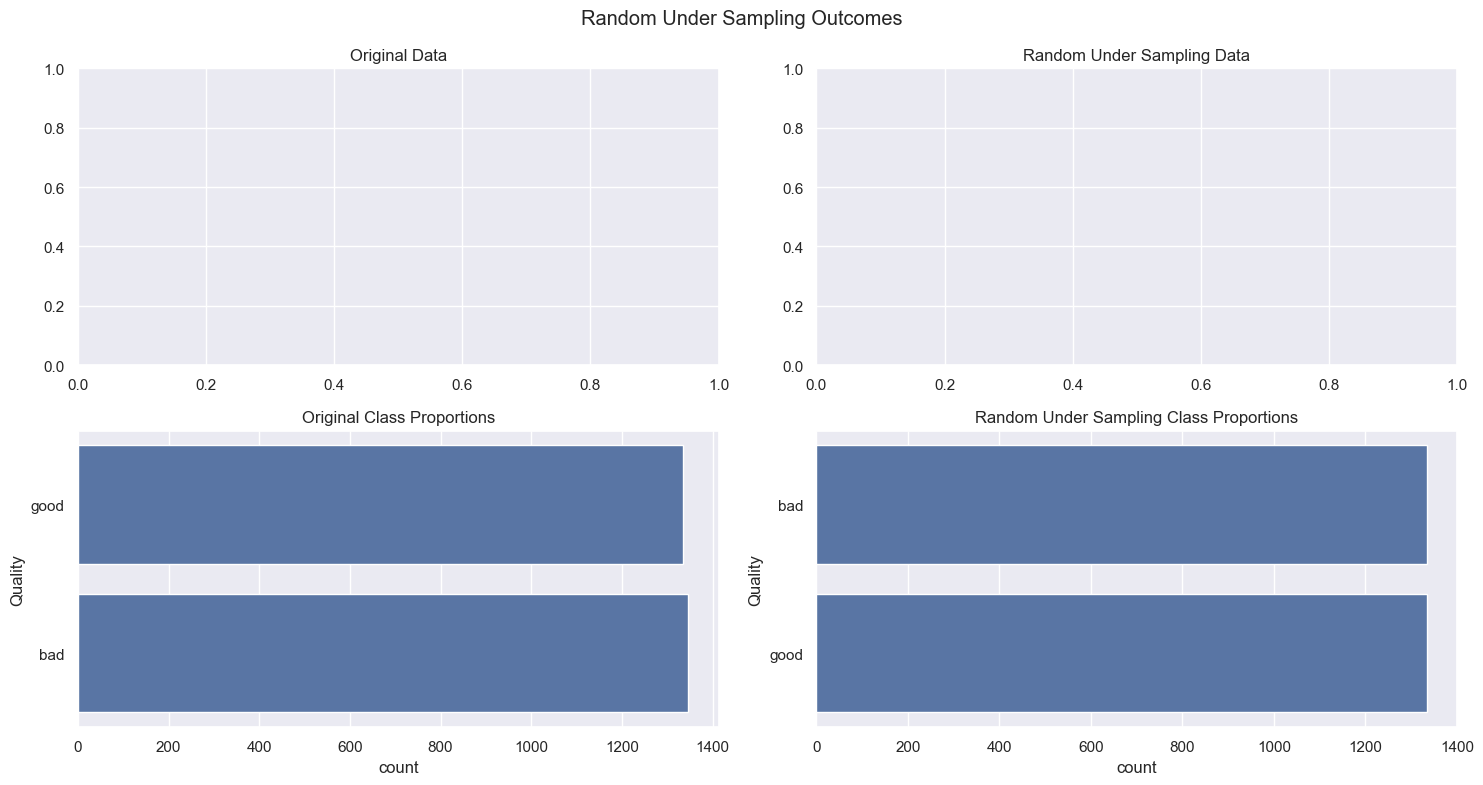

In [45]:
# Import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# Resample the data
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# View the resampled labels
plot_resample(X_train, y_train, X_res, y_res, "Random Under Sampling")

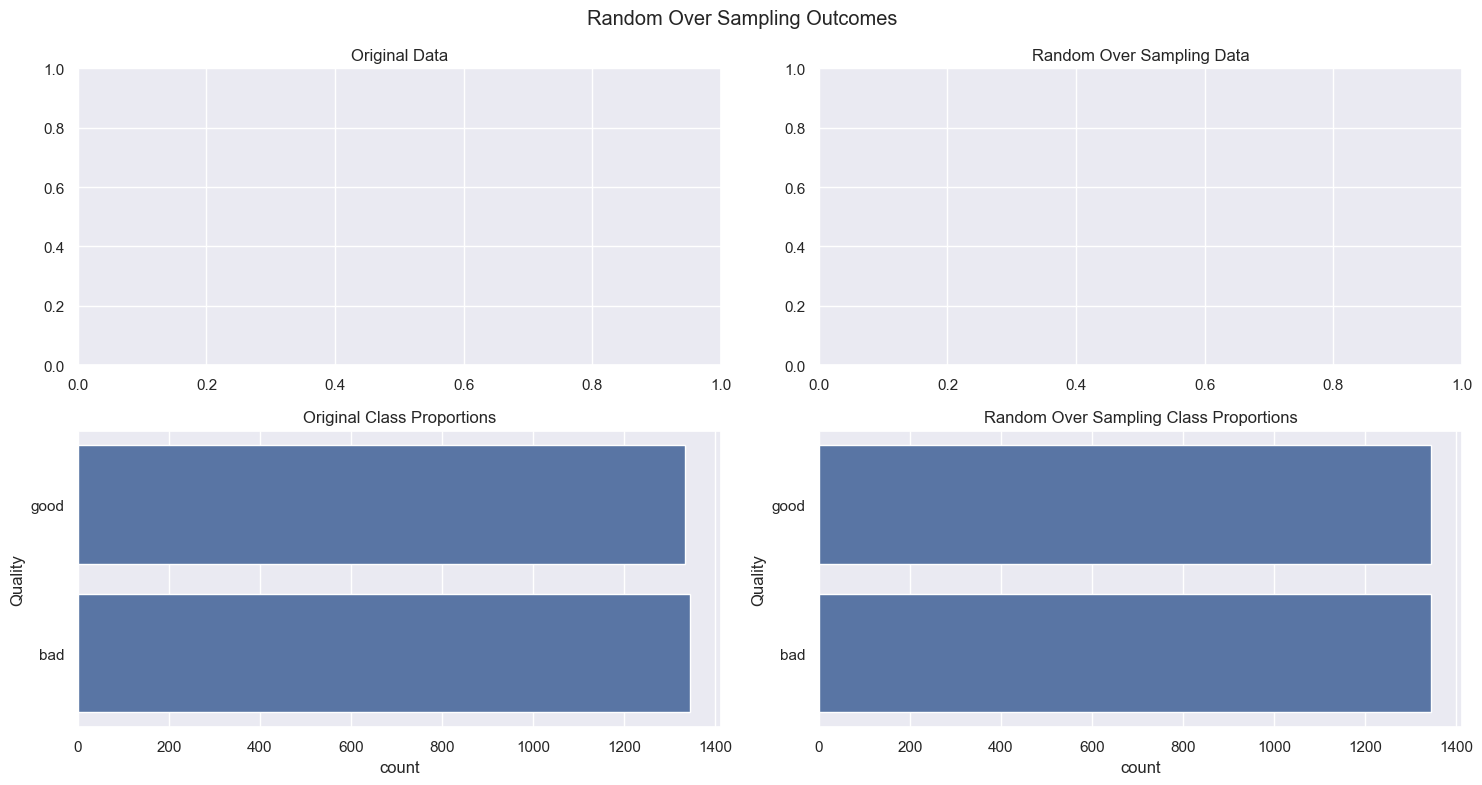

In [46]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Resample the data
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# View the resampled labels
plot_resample(X_train, y_train, X_res, y_res, "Random Over Sampling")

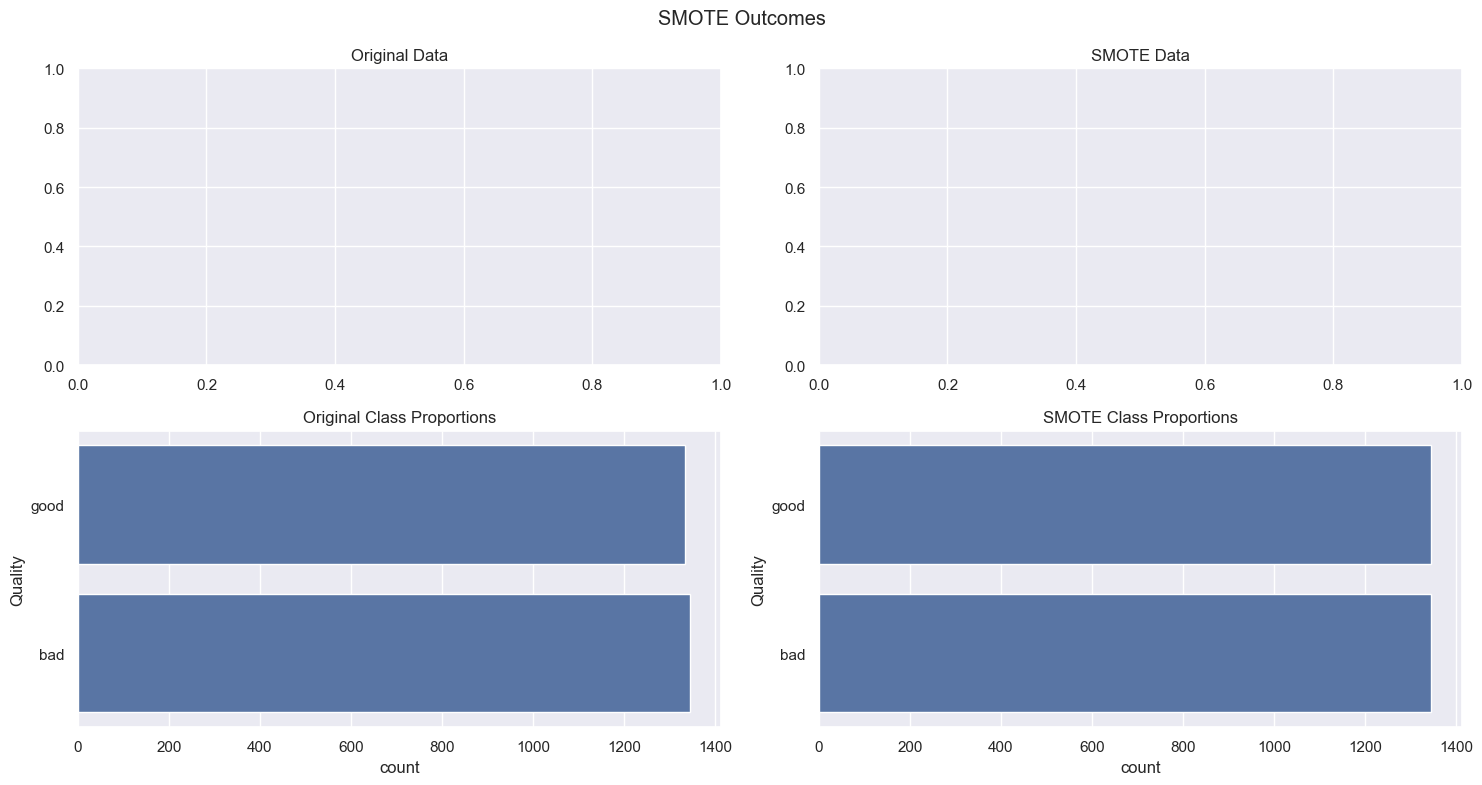

In [47]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Resample the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# View the resampled labels
plot_resample(X_train, y_train, X_res, y_res, "SMOTE")